# Pachete necesare pentru folosirea acestui Notebook

Vom folosi [scipy](https://scipy.org/), [numpy](https://numpy.org/) și [matplotlib](https://matplotlib.org/).

In [2]:
# Horjea Cosmin-Marian, 343
from scipy import misc, ndimage, signal
import numpy as np
import matplotlib.pyplot as plt

# Imaginea cu care lucrăm

Vom folosi o imagine din setul de date oferit implicit de către scipy.

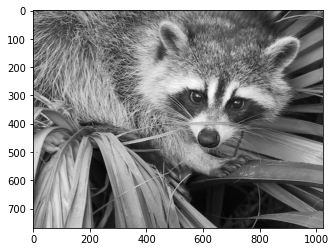

In [4]:
X = misc.face(gray=True)
plt.imshow(X, cmap=plt.cm.gray)
plt.show()


# Transformata Fourier a unei imagini

Transformata Fourier Discretă se extinde ușor la mai multe dimensiuni. Pentru un semnal bidimensional precum o imagine DFT devine:

$$
Y_{m_1,m_2} = \sum_{n_1=0}^{N_1-1}\sum_{n_2=0}^{N_2-1}x_{n_1,n_2}e^{-j2\pi(m_1 n_1/N_1 + m_2 n_2/N_2)}
$$

* unde $n_1$ și $n_2$ sunt pozițile pixelilor pe orizontală, respectiv, pe verticală
* bin-urile rezultate corespund pozițiilor pixelilor
* spectrul este în continuare simetric
* proprietățile transformatei DFT 1D sunt respectate și în cazul celei 2D

În continuare vom folosi rutina generală `fft2` ce servește mai bine activității de învățare, deși pentru semnale reale ar trebui să folosim `rfft2` ce întoarce doar informația esențială (ex. omite simetriile). De asemenea vom analiza spectrul în scală logaritmică pentru a diferenția mai bine magnitudinile bin-urilor DTF.

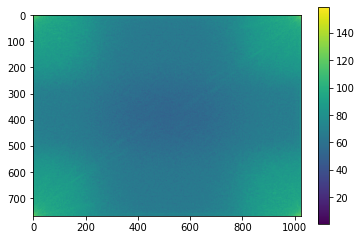

In [5]:
Y = np.fft.fft2(X)
freq_db = 20*np.log10(abs(Y))

plt.imshow(freq_db)
plt.colorbar()
plt.show()

Operațiile efectuate direct asupra imaginii se reflectă și în spectrul acesteia. Iată un exemplu a unei rotații de 45 de grade:

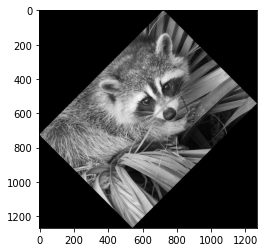

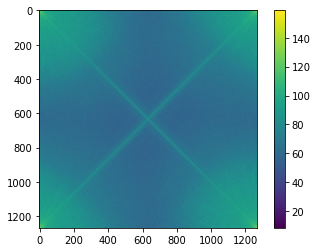

In [6]:
rotate_angle = 45
X45 = ndimage.rotate(X, rotate_angle)
plt.imshow(X45, cmap=plt.cm.gray)
plt.show()

Y45 = np.fft.fft2(X45)
plt.imshow(20*np.log10(abs(Y45)))
plt.colorbar()
plt.show()

Momentan pe axe sunt afișate numărul bin-urilor. Pentru a obține frecvențele asociate folosiți `fftfreq`:

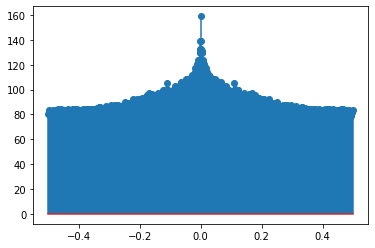

In [7]:
freq_x = np.fft.fftfreq(X.shape[1])
freq_y = np.fft.fftfreq(X.shape[0])

plt.stem(freq_x, freq_db[:][0])
plt.show()

# Atenuarea frecvențelor înalte

Pentru a anula frecvențele de peste un anumit prag `freq_cutoff` putem pur și simplu anula intrările din spectru și aplica transformata Fourier inversă:

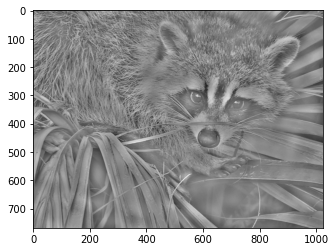

In [8]:
freq_cutoff = 120

Y_cutoff = Y.copy()
Y_cutoff[freq_db > freq_cutoff] = 0
X_cutoff = np.fft.ifft2(Y_cutoff)
X_cutoff = np.real(X_cutoff)    # avoid rounding erros in the complex domain,
                                # in practice use irfft2
plt.imshow(X_cutoff, cmap=plt.cm.gray)
plt.show()

# Zgomot

Zgomotul alb perturbă în mod egal spectrul semnalului. Este astfel egal distribuit și regăsit în toate bin-urile DFT. [Zgomotul color](https://en.wikipedia.org/wiki/Colors_of_noise) se schimbă de-a lungul frecvențelor.

Putem adăuga zgomot în limita a `pixel_noise` pixeli imaginii folosind `random.randint`:

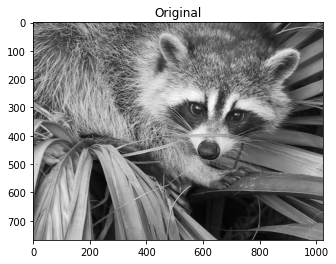

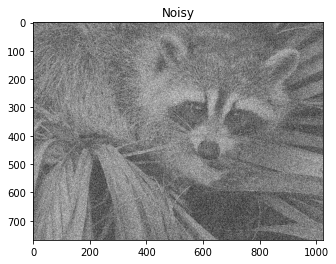

In [9]:
pixel_noise = 200

noise = np.random.randint(-pixel_noise, high=pixel_noise+1, size=X.shape)
X_noisy = X + noise
plt.imshow(X, cmap=plt.cm.gray)
plt.title('Original')
plt.show()
plt.imshow(X_noisy, cmap=plt.cm.gray)
plt.title('Noisy')
plt.show()

# Sarcini

1. [8p] Produceți imaginile și spectrul pentru funcțiile de mai jos și dați o explicație scurtă pentru fiecare rezultat.
* $x_{n_1,n_2} = \sin(2\pi n_1 + 3\pi n_2)$
* $x_{n_1,n_2} = \sin(4\pi n_1) + \cos(6\pi n_2)$
* $Y_{0,5} = Y_{0,N-5} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$
* $Y_{5,0} = Y_{N-5,0} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$
* $Y_{5,5} = Y_{N-5,N-5} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$

*Atenție*: $x$ reprezintă informație în domeniul timpului, $Y$ în domeninul frecvenței.

2. [4p] Comprimați imaginea cu ratonul de mai sus prin atenuarea frecvențelor înalte până la un prag SNR autoimpus.

3. [4p] Eliminați zgomotul adăugat la imaginea cu ratonul produsă mai sus. Prezentați raportul SNR înainte și după.

4. [4p] Alegeți o secvență scurtă de timp (ex. 5-10 secunde) și eliminați un instrument la alegere din semnalul audio rezultat în urma rezolvării sarcinilor de la [laboratorul 3](https://cs.unibuc.ro/~pirofti/ps/ps-lab-3.pdf).

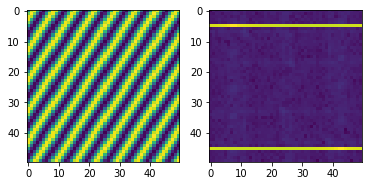

In [10]:
def f1(n1,n2):
	return np.sin(2*np.pi*n1 + 3*np.pi*n2)

n1,n2 = np.mgrid[0:5:0.1,0:5:0.1]
X = f1(n1,n2)
plt.subplot(1,2,1)
plt.imshow(X)

Y = np.fft.fft2(X)
freq_db = 20*np.log10(abs(Y))
plt.subplot(1,2,2)
plt.imshow(freq_db)
# in semnalul original vedem mai multe linii diagonale paralele iar in domeniul frecventei vedem doua linii orizontale

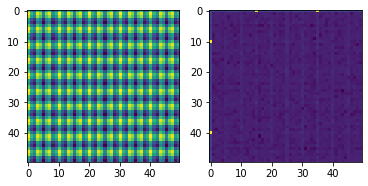

In [11]:
def f2(n1,n2):
	return np.sin(4*np.pi*n1) + np.cos(6*np.pi*n2)
n1,n2 = np.mgrid[0:5:0.1,0:5:0.1]
X = f2(n1,n2)
plt.subplot(1,2,1)
plt.imshow(X)

Y = np.fft.fft2(X)
freq_db = 20*np.log10(abs(Y))
plt.subplot(1,2,2)

plt.imshow(freq_db)
# semnalul original are linii orizontale si verticale suprapuse

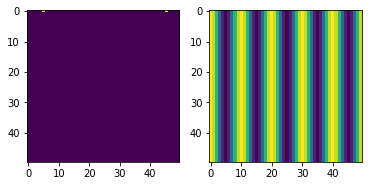

In [12]:
def f3(m1,m2,size):
	return np.where(np.logical_and(m1==0,np.logical_or(m2==5,m2 == size-5)) , 1, 0)


n1,n2 = np.mgrid[0:50:1,0:50:1]
Y = f3(n1,n2,50)
plt.subplot(1,2,1)
plt.imshow(Y)

X= np.fft.ifft2(Y)
plt.subplot(1,2,2)
plt.imshow(np.real(X))
# semnalul este format din mai multe linii verticale paralele

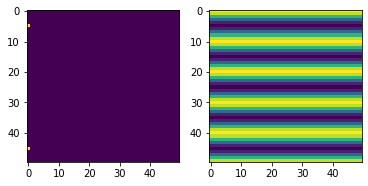

In [13]:
def f4(m1,m2,size):
	return np.where(np.logical_and(m2==0,np.logical_or(m1==5,m1 == size-5)) , 1, 0)


n1,n2 = np.mgrid[0:50:1,0:50:1]
Y = f4(n1,n2,50)
plt.subplot(1,2,1)
plt.imshow(Y)

X= np.fft.ifft2(Y)
plt.subplot(1,2,2)
plt.imshow(np.real(X))
# semnalul este format din mai multe linii orizontale paralele

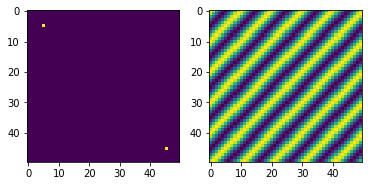

In [14]:
def f5(m1,m2,size):
	return np.where(np.logical_or(np.logical_and(m1==5,m2==5),np.logical_and(m1==size-5,m2==size-5)) , 1, 0)


n1,n2 = np.mgrid[0:50:1,0:50:1]
Y = f5(n1,n2,50)
plt.subplot(1,2,1)
plt.imshow(Y)

X= np.fft.ifft2(Y)
plt.subplot(1,2,2)
plt.imshow(np.real(X))
# semanlul are mai multe linii diagonale paralele

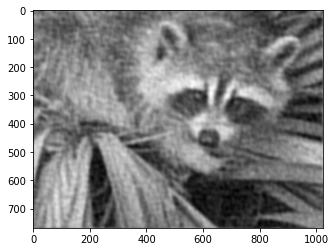

21.319134505881244


In [57]:
# 2
X = misc.face(gray=True)
plt.imshow(X, cmap=plt.cm.gray)

snr_treshold = 105 # pragul autoimpus
Y = np.fft.fft2(X)
freq_db = 20*np.log10(abs(Y))
Y_cutoff = Y.copy()
Y_cutoff[freq_db < snr_treshold] = 0
X_cutoff = np.real(np.fft.ifft2(Y_cutoff))
plt.imshow(X_cutoff, cmap=plt.cm.gray)
plt.show()


def psnr(X, X_cutoff): # functie preluata din lab 6
	mse = np.mean((X - X_cutoff)**2)
	if mse == 0:
		return 0
	max_pixel = 255
	return 20*np.log10(max_pixel/np.sqrt(mse))

print(psnr(X, X_cutoff))



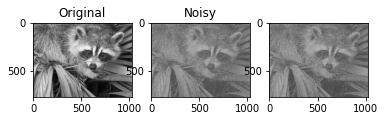

PSNR noisy:  6.858859377871012
PSNR denoised:  9.317453673872166


In [60]:
# 3 

X = misc.face(gray=True)
plt.imshow(X, cmap=plt.cm.gray)

pixel_noise = 200
noise = np.random.randint(-pixel_noise, high=pixel_noise+1, size=X.shape)
X_noisy = X + noise
plt.subplot(1,3,1)
plt.imshow(X, cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(1,3,2)
plt.imshow(X_noisy, cmap=plt.cm.gray)
plt.title('Noisy')

# ca sa atenuam zgomotul, putem incerca sa aplicam un kernel pe imagine
kernel = np.array([[1,0,0],[0,1,0],[0,0,1]])/9 # metrica psnr pare sa creasca, deci avem mai putin zgomot
denoised = signal.convolve2d(X_noisy, kernel, mode='same')
plt.subplot(1,3,3)
plt.imshow(denoised, cmap=plt.cm.gray)
plt.show()

print("PSNR noisy: ",psnr(X, X_noisy))
print("PSNR denoised: ",psnr(X, denoised))


In [11]:
# 4
import scipy.io.wavfile as wav
import sounddevice as sd

rate, data = wav.read('ps-lab-3-mono.wav')

data_fft = np.fft.rfft(data)
freqencies = np.fft.rfftfreq(data.size, d=1/rate)
data_fft_abs = np.abs(data_fft)

for i,f in enumerate(freqencies):
	# am incercat mai multe numere, si se pare ca daca eliminam frecventele de sub 200 Hz, bass-ul nu mai este prezent
	if f<200:
		data_fft[i] = 0.0


X = np.fft.irfft(data_fft)
sd.default.samplerate = rate
wav_wave = np.array(X, dtype=np.int16)
sd.play(wav_wave, blocking=True)
sd.stop()


C:\Users\horje\AppData\Local\Temp/ipykernel_14556/3940048531.py:8: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate, data = wav.read('ps-lab-3.wav')
